In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt


In [7]:
#this function takes all the numerical features and deals with the high and low outliers
def moniakq(df):
    num_feat = df.select_dtypes(include='number').columns.tolist()
    for feat in num_feat:
        q1 = df[feat].quantile(0.25)
        q3 = df[feat].quantile(0.75)
        iqr = q3-q1
        outer_fence = 1.5*iqr
        outer_fence_le = q1-outer_fence
        outer_fence_ue = q3+outer_fence
        df.loc[df[feat]>outer_fence_ue,feat]=outer_fence_ue
        df.loc[df[feat]<outer_fence_le,feat]=outer_fence_le
    return df

    

In [8]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#### Outliers function testing

In [9]:
df1=train_df[['LotFrontage','LotArea','MSZoning']]

In [10]:
df1.head()

,LotFrontage,LotArea,MSZoning
0,65.0,8450,RL
1,80.0,9600,RL
2,68.0,11250,RL
3,60.0,9550,RL
4,84.0,14260,RL


In [11]:
df2=moniakq(df1)

In [12]:
df2

,LotFrontage,LotArea,MSZoning
0,65.0,8450.0,RL
1,80.0,9600.0,RL
2,68.0,11250.0,RL
3,60.0,9550.0,RL
4,84.0,14260.0,RL
...,...,...,...
1455,62.0,7917.0,RL
1456,85.0,13175.0,RL
1457,66.0,9042.0,RL
1458,68.0,9717.0,RL


<AxesSubplot: >

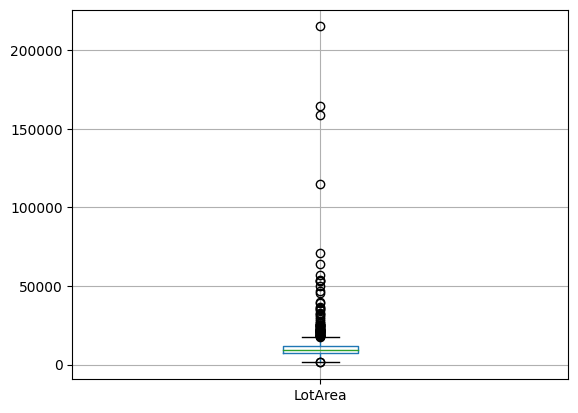

In [13]:
train_df.boxplot(column=['LotArea'])

In [14]:
df2.boxplot(column=['LotArea'])

<AxesSubplot: >

#### Feature engineering

In [15]:
train_df.shape

(1460, 81)

In [16]:
X=train_df.drop(columns=['SalePrice'])
y=train_df['SalePrice']

In [17]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
X=moniakq(X)

In [19]:
X.boxplot(column=['YrSold'])

<AxesSubplot: >

In [20]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2.0,2008,WD,Normal
1,2.0,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5.0,2007,WD,Normal
2,3.0,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9.0,2008,WD,Normal
3,4.0,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2.0,2006,WD,Abnorml
4,5.0,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12.0,2008,WD,Normal


In [21]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [22]:
#Looking for NaN
isna=X.isna().sum()/X.shape[0]*100

In [23]:
isna[isna>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

LotFrontage     17.739726   replace with int 0
Alley           93.767123   replace with str no
MasVnrType       0.547945   replace with str None
MasVnrArea       0.547945   replace with int 0
BsmtQual         2.534247   replace with str no
BsmtCond         2.534247   replace with str no
BsmtExposure     2.602740   replace with str no
BsmtFinType1     2.534247   replace with str no
BsmtFinType2     2.602740   replace with str no
Electrical       0.068493   replace with str FuseF
FireplaceQu     47.260274   replace with str no   
GarageType       5.547945   replace with str no
GarageYrBlt      5.547945   replace with 0
GarageFinish     5.547945   replace with str no
GarageQual       5.547945   replace with str no
GarageCond       5.547945   replace with str no
PoolQC          99.520548   drop
Fence           80.753425   replace with str no
MiscFeature     96.301370   drop

<AxesSubplot: >

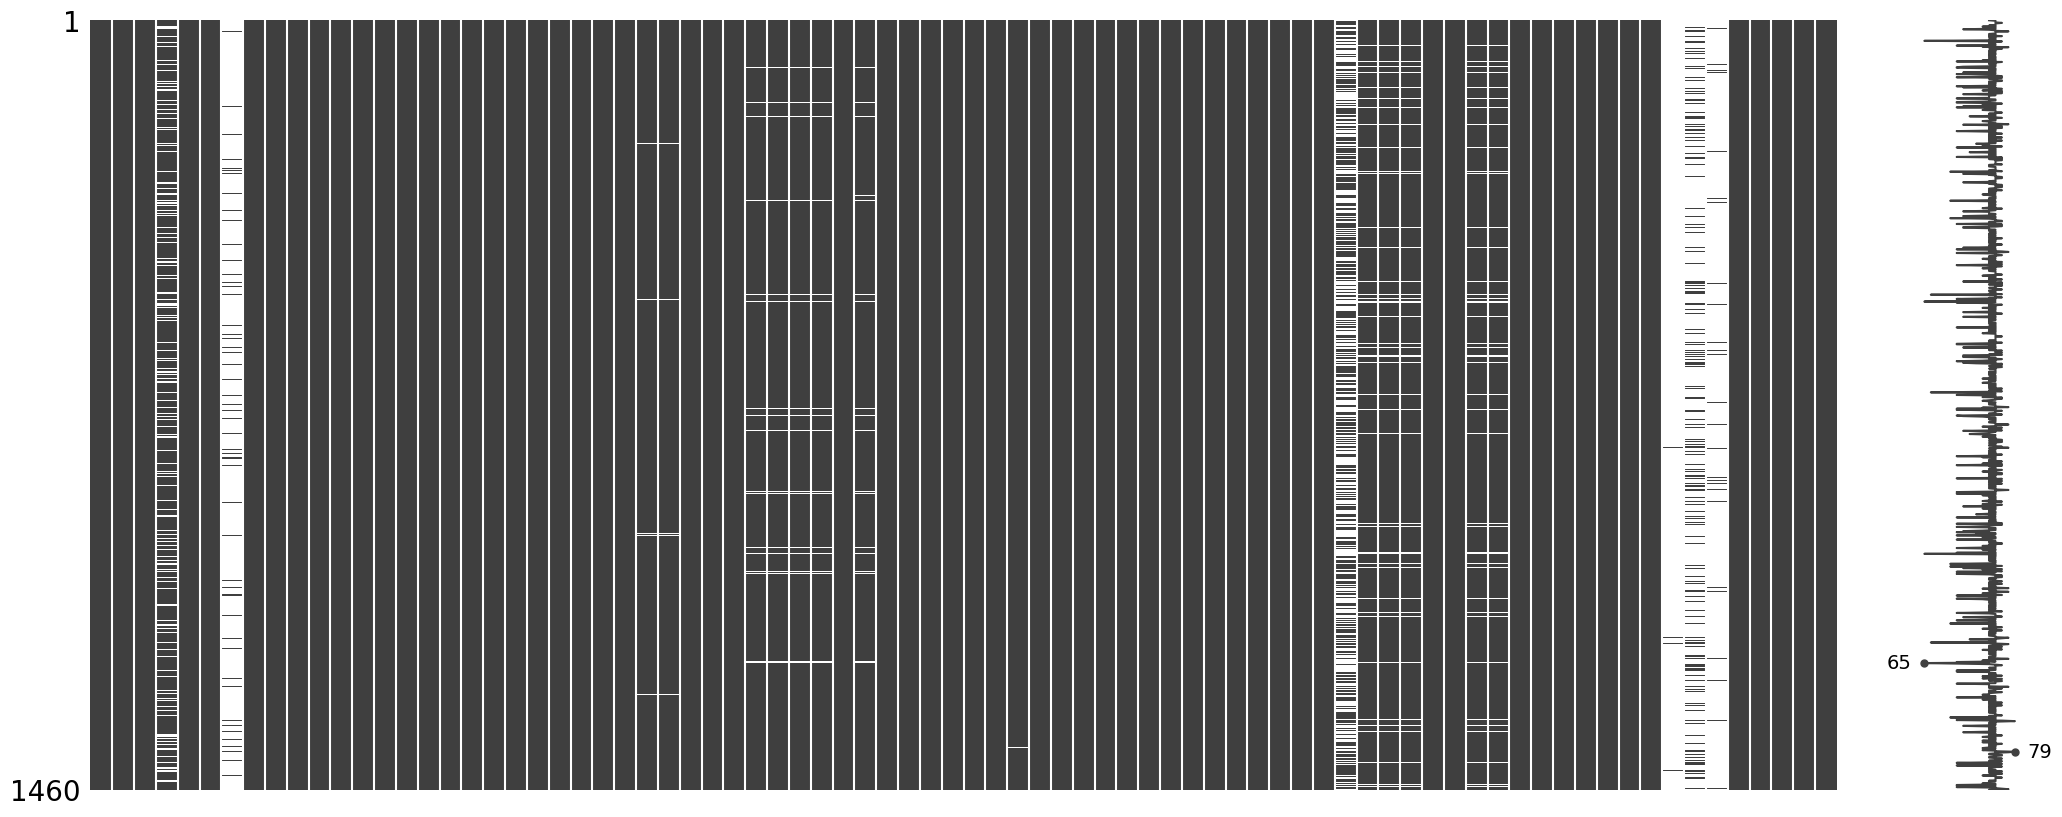

In [24]:
import missingno as msno
%matplotlib inline
msno.matrix(X)

In [25]:
#Dropping columns with too many NaNs
X = X.drop(columns=['PoolQC','MiscFeature','Id'])

In [26]:

#Imputing values manually given the nature of the data
X['LotFrontage']=X['LotFrontage'].fillna(0)
X['Alley']=X['BsmtQual'].fillna('no')
X['MasVnrType']=X['MasVnrType'].fillna('None')
X['MasVnrArea']=X['MasVnrArea'].fillna(0)
X['BsmtQual']=X['BsmtQual'].fillna('no')
X['BsmtCond']=X['BsmtCond'].fillna('no')
X['BsmtExposure']=X['BsmtExposure'].fillna('no')
X['BsmtFinType1']=X['BsmtFinType1'].fillna('no')
X['BsmtFinType2']=X['BsmtFinType2'].fillna('no')
X['Electrical']=X['Electrical'].fillna('FuseF')
X['FireplaceQu']=X['FireplaceQu'].fillna('no')
X['GarageType']=X['GarageType'].fillna('no')
X['GarageYrBlt']=X['GarageYrBlt'].fillna(0)
X['GarageFinish']=X['GarageFinish'].fillna('no')
X['GarageQual']=X['GarageQual'].fillna('no')
X['GarageCond']=X['GarageCond'].fillna('no')
X['Fence']=X['Fence'].fillna('no')


In [27]:
isna2=X.isna().sum()/X.shape[0]*100

In [28]:
isna2[isna2>0]

Series([], dtype: float64)

In [29]:
numerical_features = X.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

string_features = X.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")

There are 36 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are 41 string features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fire

#### Aplying PCA to num features

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X[numerical_features]) 

In [32]:
X_pca[1]

array([  39.10624431,  195.18501364,  717.81621495, -235.37799785,
         -7.55535907,  -79.8853436 ,  -78.67629664,  -69.08824539,
        186.17259928,  -71.363098  ])

In [33]:
X_pca=pd.DataFrame(X_pca,columns=['a','b','c','d','e','f','g','h','i','j'])

In [34]:
X_pca

,a,b,c,d,e,f,g,h,i,j
0,1187.209888,-128.742162,-257.068186,-782.589475,-43.312734,-143.185755,73.374403,47.227103,-111.252725,27.044289
1,39.106244,195.185014,717.816215,-235.377998,-7.555359,-79.885344,-78.676297,-69.088245,186.172599,-71.363098
2,-1608.177199,-85.027661,-466.206621,-434.486802,-105.078000,-162.283032,95.653144,6.426838,-113.612671,22.836666
3,100.855812,-127.292575,-556.500150,-218.066293,-189.640653,35.645935,94.066474,-144.346392,-99.867173,-10.721709
4,-4663.337378,-386.628006,-466.220183,-560.250728,40.013215,-175.800704,287.849858,70.989246,24.430002,8.688235
...,...,...,...,...,...,...,...,...,...,...
1455,1728.344573,-396.968161,-559.840890,220.987915,-185.605243,-95.937296,-66.027734,-70.374548,-68.348283,5.581670
1456,-3617.134387,-489.407054,698.628512,66.680033,255.513355,475.153793,-138.124551,33.590524,209.839997,-46.233955
1457,540.171215,-942.847315,-709.530519,-216.903843,209.066009,-41.179714,-370.082260,-2.689490,-88.225122,4.266651
1458,-17.810300,635.898749,130.140809,51.464368,-237.764897,234.590132,-148.868618,28.683945,410.043256,448.922249


In [35]:
X_str=X[string_features]

In [36]:
X_pca=X_pca.join(X_str)

In [37]:
X_pca

,a,b,c,d,e,f,g,h,i,j,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,1187.209888,-128.742162,-257.068186,-782.589475,-43.312734,-143.185755,73.374403,47.227103,-111.252725,27.044289,...,Typ,no,Attchd,RFn,TA,TA,Y,no,WD,Normal
1,39.106244,195.185014,717.816215,-235.377998,-7.555359,-79.885344,-78.676297,-69.088245,186.172599,-71.363098,...,Typ,TA,Attchd,RFn,TA,TA,Y,no,WD,Normal
2,-1608.177199,-85.027661,-466.206621,-434.486802,-105.078000,-162.283032,95.653144,6.426838,-113.612671,22.836666,...,Typ,TA,Attchd,RFn,TA,TA,Y,no,WD,Normal
3,100.855812,-127.292575,-556.500150,-218.066293,-189.640653,35.645935,94.066474,-144.346392,-99.867173,-10.721709,...,Typ,Gd,Detchd,Unf,TA,TA,Y,no,WD,Abnorml
4,-4663.337378,-386.628006,-466.220183,-560.250728,40.013215,-175.800704,287.849858,70.989246,24.430002,8.688235,...,Typ,TA,Attchd,RFn,TA,TA,Y,no,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1728.344573,-396.968161,-559.840890,220.987915,-185.605243,-95.937296,-66.027734,-70.374548,-68.348283,5.581670,...,Typ,TA,Attchd,RFn,TA,TA,Y,no,WD,Normal
1456,-3617.134387,-489.407054,698.628512,66.680033,255.513355,475.153793,-138.124551,33.590524,209.839997,-46.233955,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,540.171215,-942.847315,-709.530519,-216.903843,209.066009,-41.179714,-370.082260,-2.689490,-88.225122,4.266651,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,-17.810300,635.898749,130.140809,51.464368,-237.764897,234.590132,-148.868618,28.683945,410.043256,448.922249,...,Typ,no,Attchd,Unf,TA,TA,Y,no,WD,Normal


#### Train / Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 77) (292, 77) (1168,) (292,)


In [39]:
X_train_p, X_test_p, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2022)

print(X_train_p.shape, X_test_p.shape, y_train.shape, y_test.shape)

(1168, 51) (292, 51) (1168,) (292,)


In [40]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

numerical_features_p = X_train_p.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features_p)} numerical features: {numerical_features}\n")

string_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")

There are 36 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are 10 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

#### Applying transformations

In [41]:
# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
  ]
)

# Pipeline for string features
string_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False,drop='first')),
    ('scale', StandardScaler())
  ]
)

# Now let's merge both pipeline into one single pre-processing object
# We can use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string', string_pipeline, string_features)
  ]
)

full_processor_p = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features_p),
    ('string', string_pipeline, string_features)
  ]
)

In [42]:
X_train = full_processor.fit_transform(X_train)
X_test  = full_processor.transform(X_test)

print(X_train.shape, X_test.shape)

(1168, 249) (292, 249)


/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 14, 16, 27, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [43]:
enc_cat_features = full_processor.named_transformers_['string']['encode'].get_feature_names_out()

In [44]:
enc_cat_features

array(['x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Pave', 'x2_Fa', 'x2_Gd',
       'x2_TA', 'x2_no', 'x3_IR2', 'x3_IR3', 'x3_Reg', 'x4_HLS', 'x4_Low',
       'x4_Lvl', 'x5_NoSeWa', 'x6_CulDSac', 'x6_FR2', 'x6_FR3',
       'x6_Inside', 'x7_Mod', 'x7_Sev', 'x8_Blueste', 'x8_BrDale',
       'x8_BrkSide', 'x8_ClearCr', 'x8_CollgCr', 'x8_Crawfor',
       'x8_Edwards', 'x8_Gilbert', 'x8_IDOTRR', 'x8_MeadowV',
       'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill', 'x8_NWAmes', 'x8_NoRidge',
       'x8_NridgHt', 'x8_OldTown', 'x8_SWISU', 'x8_Sawyer', 'x8_SawyerW',
       'x8_Somerst', 'x8_StoneBr', 'x8_Timber', 'x8_Veenker', 'x9_Feedr',
       'x9_Norm', 'x9_PosA', 'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe',
       'x9_RRNn', 'x10_Feedr', 'x10_Norm', 'x10_PosN', 'x10_RRAe',
       'x10_RRAn', 'x10_RRNn', 'x11_2fmCon', 'x11_Duplex', 'x11_Twnhs',
       'x11_TwnhsE', 'x12_1.5Unf', 'x12_1Story', 'x12_2.5Fin',
       'x12_2.5Unf', 'x12_2Story', 'x12_SFoyer', 'x12_SLvl', 'x13_Gable',
       'x13_Gambrel', 'x13

In [45]:
X_train_p = full_processor_p.fit_transform(X_train_p)
X_test_p = full_processor_p.transform(X_test_p)

print(X_train_p.shape, X_test_p.shape)

(1168, 223) (292, 223)


/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 14, 16, 27, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Models

#### Baseline

In [209]:
LR = LinearRegression()

In [215]:
LR.fit(X_train,y_train)

LinearRegression()

In [213]:
LR_train_p_pred=LR.predict(X_train_p)

In [216]:
LR_train_pred=LR.predict(X_train)

In [214]:
print('MSE con PCA=' , mean_squared_error(y_train,LR_train_p_pred, squared=False))

MSE con PCA= 21990.22347872583


In [218]:
print('MSE sin PCA=' , mean_squared_error(y_train,LR_train_pred, squared=False))

MSE sin PCA= 19811.15297082242


In [219]:
LR_test_pred=LR.predict(X_test)

In [220]:
print('MSE sin PCA=' , mean_squared_error(y_test,LR_test_pred, squared=False))

MSE sin PCA= 4.200137423866048e+16


#### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
param_grid = {

    'max_depth': [100],
    'max_features': [0.7,0.8,0.9],
    'min_samples_leaf': [3,  5],
    'min_samples_split': [8,12],
    'n_estimators': [100]
}
rf = RandomForestRegressor(criterion='squared_error')
grid_search_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [78]:
grid_search_rf.fit(X_train[:,feat_mask],y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END max_depth=100, max_features=0.7, min_samples_leaf=5, min_samples_split=8, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100], 'max_features': [0.7, 0.8, 0.9],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12], 'n_estimators': [100]},
             verbose=2)

In [80]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=0.8, min_samples_leaf=3,
                      min_samples_split=8)

In [68]:
#Good model
RF = RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=3,min_samples_split=8)

In [69]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=3,
                      min_samples_split=8)

In [81]:
y_train_pred_rf=grid_search_rf.predict(X_train[:,feat_mask])

In [82]:
print('MSE train RandomForest=' , mean_squared_error(y_train,y_train_pred_rf, squared=False))

MSE train RandomForest= 17753.462957505293


In [83]:
y_test_pred_rf=grid_search_rf.predict(X_test[:,feat_mask])

In [84]:
print('MSE test RandomForest=' , mean_squared_error(y_test,y_test_pred_rf, squared=False))

MSE test RandomForest= 27427.19481045709


In [ ]:
enc_cat_features = full_processor.named_transformers_['string']['encode'].get_feature_names_out()

In [70]:
RF.feature_importances_

array([2.07182931e-03, 4.91281030e-03, 1.09953799e-02, 4.77545427e-01,
       3.63929008e-03, 1.43780531e-02, 1.00304026e-02, 5.17630526e-03,
       2.48273510e-02, 0.00000000e+00, 4.87528752e-03, 4.67961953e-02,
       3.31250601e-02, 1.49482810e-02, 0.00000000e+00, 1.20790397e-01,
       8.26394828e-04, 0.00000000e+00, 1.52197641e-02, 1.10710772e-03,
       2.39163721e-03, 0.00000000e+00, 6.17953231e-03, 3.97185889e-03,
       4.99487915e-03, 1.01686255e-01, 1.76351930e-02, 4.64822079e-03,
       4.15014984e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.96549521e-03, 1.28681411e-03,
       4.85766887e-05, 0.00000000e+00, 4.06214020e-04, 1.13216118e-03,
       0.00000000e+00, 9.67418813e-07, 1.14572269e-03, 6.14684106e-04,
       0.00000000e+00, 7.25169136e-05, 0.00000000e+00, 7.05712200e-04,
       2.82162552e-04, 2.39768391e-04, 6.02423502e-04, 0.00000000e+00,
       1.22878032e-04, 4.94773023e-07, 0.00000000e+00, 4.53406624e-04,
      

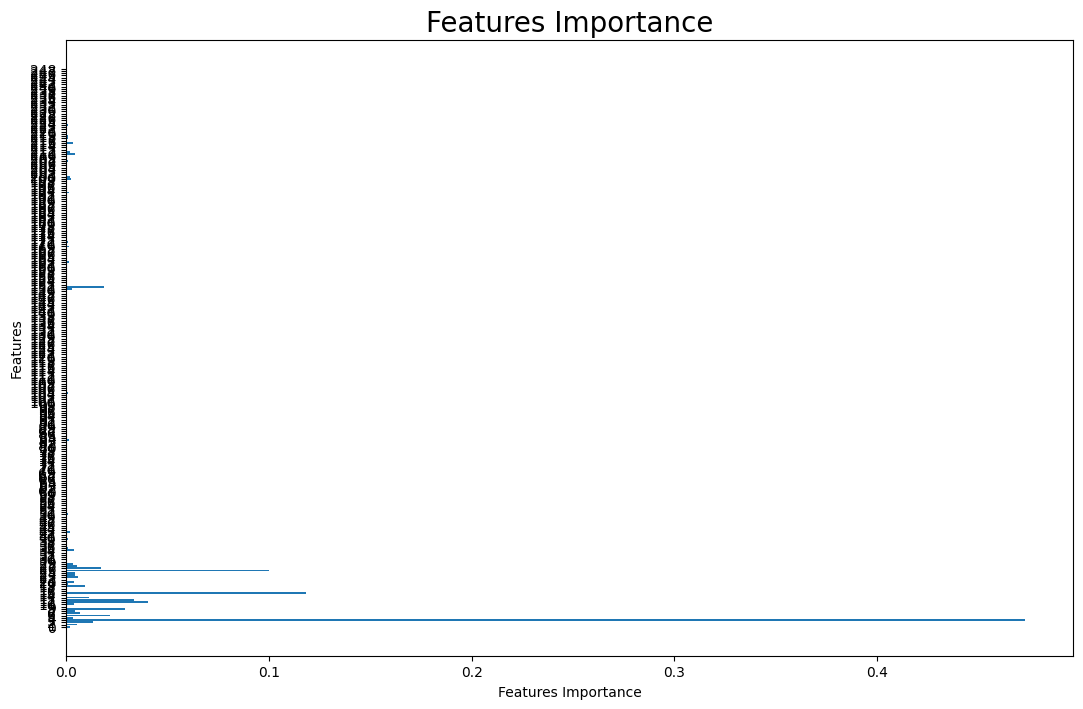

In [62]:
plt.figure(figsize=(13, 8))
caract = X_train.shape[1]
plt.barh(range(caract), RF.feature_importances_)
plt.yticks(np.arange(caract)) #,X_train.columns)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Features Importance', fontsize=20)
plt.show()

In [71]:
RF.feature_importances_[RF.feature_importances_>0.001]

array([0.00207183, 0.00491281, 0.01099538, 0.47754543, 0.00363929,
       0.01437805, 0.0100304 , 0.00517631, 0.02482735, 0.00487529,
       0.0467962 , 0.03312506, 0.01494828, 0.1207904 , 0.01521976,
       0.00110711, 0.00239164, 0.00617953, 0.00397186, 0.00499488,
       0.10168626, 0.01763519, 0.00464822, 0.00415015, 0.0029655 ,
       0.00128681, 0.00113216, 0.00114572, 0.00138265, 0.0131399 ,
       0.00196749, 0.00109363, 0.00106322, 0.00241619, 0.00209833,
       0.00104873, 0.00395766, 0.00250816, 0.00317843])

In [76]:
feat_mask = RF.feature_importances_>0.001

In [77]:
X_train[:,feat_mask]

array([[ 0.14769578,  0.40865777,  0.42881282, ..., -0.96632025,
         0.82350526, -0.60768814],
       [ 0.14769578,  0.40865777,  0.43526651, ..., -0.96632025,
         0.82350526, -0.60768814],
       [ 1.7674955 , -1.77619489, -1.46492336, ...,  1.03485361,
         0.82350526, -0.60768814],
       ...,
       [-0.9321707 ,  0.72077958,  0.15186548, ..., -0.96632025,
         0.82350526, -0.60768814],
       [ 0.4176624 , -1.77619489,  0.49924218, ..., -0.96632025,
        -1.21432132,  1.6455809 ],
       [-0.9321707 , -1.77619489,  1.01806248, ..., -0.96632025,
         0.82350526, -0.60768814]])

In [286]:
X_train[:,RF.feature_importances_>0.001].shape

(1168, 45)

#### XGboost

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

In [87]:
param_dist = {
    'n_estimators':[5,6,7,8],
    'max_depth':[20,30,35], 
    'learning_rate':[0.3,0.4,0.5],
    }
#Create the lgbm moodel object
bst = XGBRegressor(reg_lambda=2,reg_alpha=1)
#Create the GridSearch object
bst_grid = GridSearchCV(bst, param_dist,cv = 5, n_jobs = -1, verbose = 2)

In [88]:
bst_grid.fit(X_train[:,feat_mask],y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=7; total time=   0.1s[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.1s[CV] END ....learning_rate=0.3, max_depth=20, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [20, 30, 35],
                         'n_estimators': [5, 6, 7, 8]},
             verbose=2)

In [256]:
bst_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=35, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [288]:
bst_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
bst_train_pred=bst_grid.predict(X_train[:,feat_mask])
bst_test_pred=bst_grid.predict(X_test[:,feat_mask])

In [90]:
print('MSE train XGBoost=' , mean_squared_error(y_train,bst_train_pred, squared=False))
print('MSE test XGBoost=' , mean_squared_error(y_test,bst_test_pred, squared=False))

MSE train XGBoost= 6333.4755598527145
MSE test XGBoost= 29131.49604538569


In [241]:
bst_train_pred2=bst_grid2.predict(X_train)
bst_test_pred2=bst_grid2.predict(X_test)
print('MSE2 train XGBoost=' , mean_squared_error(y_train,bst_train_pred2, squared=False))
print('MSE2 test XGBoost=' , mean_squared_error(y_test,bst_test_pred2, squared=False))

MSE2 train XGBoost= 8011.072273200967
MSE2 test XGBoost= 31303.222218650364


In [91]:
print('MSE train XGBoost con 45 features de acuerdo a la improtancia en randomforest=' , mean_squared_error(y_train,bst_train_pred, squared=False))
print('MSE test XGBoost con 45 features de acuerdo a la improtancia en randomforest=' , mean_squared_error(y_test,bst_test_pred, squared=False))

MSE train XGBoost con 45 features de acuerdo a la improtancia en randomforest= 6333.4755598527145
MSE test XGBoost con 45 features de acuerdo a la improtancia en randomforest= 29131.49604538569


#### MLP

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

2023-03-27 16:43:35.524525: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-27 16:43:35.549613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-27 16:43:35.550332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 16:43:36.145388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [92]:
X_train.shape

(1168, 249)

In [129]:
X_train[:,feat_mask].shape

(1168, 39)

In [130]:
model = keras.Sequential()
model.add(layers.Input(shape=39))
#model.add(layers.Dense(8, input_dim=6, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               20000     
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               150300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               30100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [135]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [136]:
model.compile(
  loss='mse', 
  optimizer=opt,
  metrics=[keras.metrics.RootMeanSquaredError()],
)

In [137]:
cp2 = keras.callbacks.ModelCheckpoint('/home/manuelquiros/Documents/Kaggle/House_Prices/MLP1', save_best_only=True)
log_dir2 = "MLP1/logs/fit/"
tb2 = keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)
es2 = keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=30)
lr = keras.callbacks.ReduceLROnPlateau(monitor='root_mean_squared_error', factor=0.2,patience=15, min_lr=0.00000001)

In [138]:
history = model.fit(
  X_train[:,feat_mask], 
  y_train, 
  epochs=200, 
  batch_size=8, 
  validation_split=0.2,
  callbacks=[cp2,lr,tb2]
)

Epoch 1/200
 97/117 [=======================>......] - ETA: 0s - loss: 251723776.0000 - root_mean_squared_error: 15865.8057

2023-03-27 17:40:19.296457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-27 17:40:19.306106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-27 17:40:19.316184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-27 17:40

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


117/117 [==============================] - 1s 8ms/step - loss: 243244640.0000 - root_mean_squared_error: 15596.3018 - val_loss: 767051136.0000 - val_root_mean_squared_error: 27695.6875 - lr: 0.0010
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 206556912.0000 - root_mean_squared_error: 14372.0879 - val_loss: 778789440.0000 - val_root_mean_squared_error: 27906.7988 - lr: 0.0010
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 205994800.0000 - root_mean_squared_error: 14352.5186 - val_loss: 767430912.0000 - val_root_mean_squared_error: 27702.5430 - lr: 0.0010
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 225481696.0000 - root_mean_squared_error: 15016.0479 - val_loss: 804852352.0000 - val_root_mean_squared_error: 28369.9199 - lr: 0.0010
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 216342592.0000 - root_mean_squared_error: 14708.5889 - val_loss: 803036288.0000 - val_root_mean_s

2023-03-27 17:40:21.448701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-27 17:40:21.458377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-27 17:40:21.466498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-27 17:40

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


117/117 [==============================] - 1s 9ms/step - loss: 208436048.0000 - root_mean_squared_error: 14437.3145 - val_loss: 766084864.0000 - val_root_mean_squared_error: 27678.2383 - lr: 0.0010
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 219413280.0000 - root_mean_squared_error: 14812.6055 - val_loss: 780368448.0000 - val_root_mean_squared_error: 27935.0762 - lr: 0.0010
Epoch 8/200
 97/117 [=======================>......] - ETA: 0s - loss: 239452240.0000 - root_mean_squared_error: 15474.2441

2023-03-27 17:40:22.422518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-27 17:40:22.436988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-27 17:40:22.454236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-27 17:40

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


117/117 [==============================] - 1s 6ms/step - loss: 231985584.0000 - root_mean_squared_error: 15231.0732 - val_loss: 760171840.0000 - val_root_mean_squared_error: 27571.2148 - lr: 0.0010
Epoch 9/200
117/117 [==============================] - 0s 2ms/step - loss: 210027184.0000 - root_mean_squared_error: 14492.3145 - val_loss: 777404096.0000 - val_root_mean_squared_error: 27881.9668 - lr: 0.0010
Epoch 10/200
 97/117 [=======================>......] - ETA: 0s - loss: 204867376.0000 - root_mean_squared_error: 14313.1885

2023-03-27 17:40:23.419667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-27 17:40:23.428769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-27 17:40:23.438498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-27 17:40

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


117/117 [==============================] - 1s 6ms/step - loss: 202251232.0000 - root_mean_squared_error: 14221.5059 - val_loss: 746955904.0000 - val_root_mean_squared_error: 27330.4941 - lr: 0.0010
Epoch 11/200
117/117 [==============================] - 0s 2ms/step - loss: 200577792.0000 - root_mean_squared_error: 14162.5488 - val_loss: 769774400.0000 - val_root_mean_squared_error: 27744.8086 - lr: 0.0010
Epoch 12/200
117/117 [==============================] - 0s 2ms/step - loss: 249607440.0000 - root_mean_squared_error: 15798.9697 - val_loss: 759714816.0000 - val_root_mean_squared_error: 27562.9238 - lr: 0.0010
Epoch 13/200
117/117 [==============================] - 0s 3ms/step - loss: 226914688.0000 - root_mean_squared_error: 15063.6875 - val_loss: 792679360.0000 - val_root_mean_squared_error: 28154.5625 - lr: 0.0010
Epoch 14/200
117/117 [==============================] - 0s 2ms/step - loss: 218895456.0000 - root_mean_squared_error: 14795.1162 - val_loss: 795819520.0000 - val_root_me

2023-03-27 17:40:28.666559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-27 17:40:28.675083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-27 17:40:28.683058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-27 17:40

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP1/assets


117/117 [==============================] - 1s 6ms/step - loss: 209227120.0000 - root_mean_squared_error: 14464.6855 - val_loss: 742808256.0000 - val_root_mean_squared_error: 27254.5098 - lr: 0.0010
Epoch 29/200
117/117 [==============================] - 0s 2ms/step - loss: 194955968.0000 - root_mean_squared_error: 13962.6631 - val_loss: 771176064.0000 - val_root_mean_squared_error: 27770.0566 - lr: 0.0010
Epoch 30/200
117/117 [==============================] - 0s 2ms/step - loss: 226832000.0000 - root_mean_squared_error: 15060.9424 - val_loss: 772264512.0000 - val_root_mean_squared_error: 27789.6484 - lr: 0.0010
Epoch 31/200
117/117 [==============================] - 0s 2ms/step - loss: 205769024.0000 - root_mean_squared_error: 14344.6514 - val_loss: 814056896.0000 - val_root_mean_squared_error: 28531.6816 - lr: 0.0010
Epoch 32/200
117/117 [==============================] - 0s 2ms/step - loss: 185516288.0000 - root_mean_squared_error: 13620.4365 - val_loss: 784960448.0000 - val_root_me

In [114]:
model = keras.models.load_model('MLP1/')

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               125000    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 305,501
Trainable params: 305,501
Non-trainable params: 0
_________________________________________________________________
